In [1]:
from os.path import join
from bs4 import BeautifulSoup

DATA_PATH = "data"
files = [
    "BlurbGenreCollection_EN_train.txt",
    "BlurbGenreCollection_EN_dev.txt",
    "BlurbGenreCollection_EN_test.txt"
    ]

blurb_lens = []
for f in files:
    soup = BeautifulSoup(open(join(DATA_PATH, f), "rt").read(), "html.parser")
    for book in soup.findAll("book"):
        book_soup = BeautifulSoup(str(book), "html.parser")
        blurb = str(book_soup.find("body").string)
        blurb_lens.append(len(blurb.split()))

print(sum(blurb_lens)/len(blurb_lens))

156.962478507846


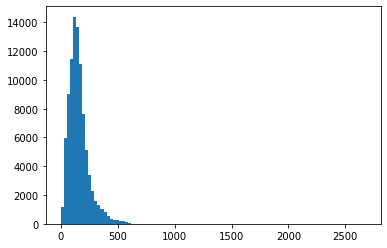

In [2]:
import matplotlib.pyplot as plt

plt.hist(blurb_lens, 100)
plt.show()

In [4]:
def proportion(num):
    over_num = [cnt for cnt in blurb_lens if cnt > num]
    return len(over_num)/len(blurb_lens) * 100

print(proportion(300))
print(proportion(400))
print(proportion(500))
print(proportion(600))

6.86551896750604
2.1981848651707403
0.7149541863451369
0.07182188173330141


In [1]:
from os.path import join
from bs4 import BeautifulSoup
from transformers import BertTokenizer
from tqdm import tqdm

DATA_PATH = "data"

tokenizer = BertTokenizer.from_pretrained(
    join(DATA_PATH, "model_files/bert-base-uncased"), local_files_only=True
)

files = [
    "BlurbGenreCollection_EN_train.txt",
    "BlurbGenreCollection_EN_dev.txt",
    "BlurbGenreCollection_EN_test.txt"
    ]

token_lens = []
for f in files:
    soup = BeautifulSoup(open(join(DATA_PATH, f), "rt").read(), "html.parser")
    for book in tqdm(soup.findAll("book"), desc="Book"):
        book_soup = BeautifulSoup(str(book), "html.parser")
        tokens = tokenizer.tokenize(str(book_soup.find("body").string))
        token_lens.append(len(tokens))

print(sum(token_lens)/len(token_lens))

Book: 100%|██████████| 18394/18394 [01:58<00:00, 155.45it/s]207.717141489107



In [3]:
def proportion(num):
    over_num = [cnt for cnt in token_lens if cnt > num]
    return len(over_num)/len(token_lens) * 100

print(proportion(300))
print(proportion(350))
print(proportion(384))
print(proportion(400))
print(proportion(500))
print(proportion(600))

16.114218556162534
10.212853940409602
7.712146603695562
6.802402768407077
3.098134807495593
1.313469867455982


In [8]:
import pandas as pd
import numpy as np

train = pd.read_pickle("data/dataframes/train_raw.pkl")
dev = pd.read_pickle("data/dataframes/dev_raw.pkl")
test = pd.read_pickle("data/dataframes/test_raw.pkl")

df = pd.concat([train, dev, test])

all_topics = np.zeros(152, dtype=np.int8)

for i in df["topics"]:
    all_topics = all_topics + np.array(i)

print(all_topics)


[34270 32812  3877 19792  3754  1459  1256  5993  3193  3622   881  1348
   399  3431  4698  1287   263  2585  2453  1930  2145  7145  3754  1306
   835  3204   592  4428  3956  7378   743  8856  1676  6429  1900   632
  1333  3415  1665  1147   768   453   621  7728     0     0     0     0
     0     0   559   530   790   283  3434  1804   409   904   322  1449
   285   366   603   841  1320   285   304   184  1536   321   353   452
   627   555   147   298   776   117   920   416    49  1071  1293   549
   190  1037  1552  1773  1374   328  1966   569   354   365  4541  3681
     5    74   911   294  3387    14   101     5    14    17   332    17
   128   248   201   436  1101   275   506  1258  2629   422   575  5463
  3003    43  1244   164  1089   523  1181   188    65   220   643   582
  1317   214   639   238   376    28   270   125   495   151   143   192
    47    59   123   241   890    85   172    88]


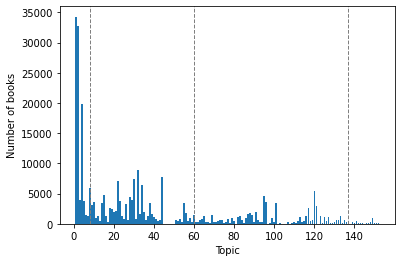

In [28]:
import matplotlib.pyplot as plt

x = list(range(1, 153, 1))
h = list(all_topics)
plt.xlabel("Topic")
plt.ylabel("Number of books")
plt.bar(x, h)
plt.axvline(x=8, c="grey", ls="--", lw=1)
plt.axvline(x=60, c="grey", ls="--", lw=1)
plt.axvline(x=137, c="grey", ls="--", lw=1)
plt.savefig("data/plots/topic_distribution", dpi=200)
